In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
details = pd.read_csv('/Users/adrejamondol/Library/CloudStorage/OneDrive-Personal/Erdos-DS-Project/car-details-v3.csv')

details.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [3]:
fuel_unique_entries = details['fuel'].unique()
print('Types of fuel: ',fuel_unique_entries)

seller_unique_entries = details['seller_type'].unique()
print('Types of seller: ',seller_unique_entries)

transmission_unique_entries = details ['transmission'].unique()
print('Types of transmission: ',transmission_unique_entries)

owner_unique_entries = details ['owner'].unique()
print ('Types of owners: ', owner_unique_entries)

Types of fuel:  ['Diesel' 'Petrol' 'LPG' 'CNG']
Types of seller:  ['Individual' 'Dealer' 'Trustmark Dealer']
Types of transmission:  ['Manual' 'Automatic']
Types of owners:  ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


## 1. Impact of Mileage on Selling Price

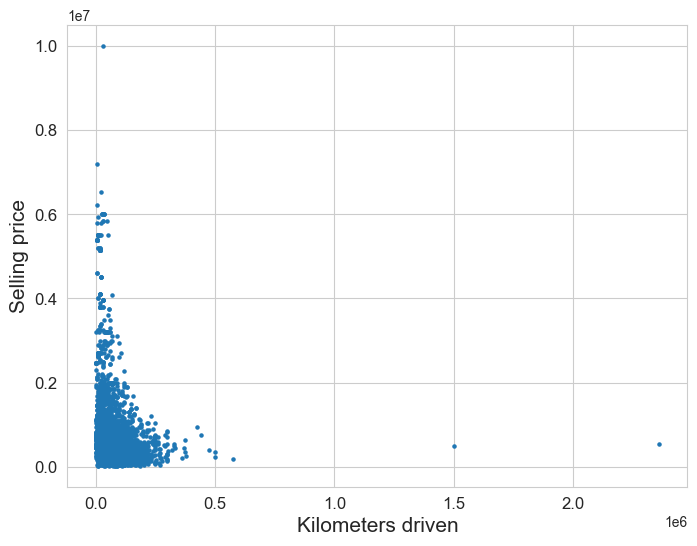

In [4]:
# scatter plot of selling price as a function of 
# the km driven 

plt.figure (figsize=(8,6))

plt.scatter (details['km_driven'], details['selling_price'], s=5)
plt.xlabel ('Kilometers driven',  fontsize=15)
plt.ylabel ('Selling price', fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

So cars with lower mileage have a higher selling price. 

## 2. Impact of Fuel type on Selling Price

Text(0, 0.5, 'Selling price')

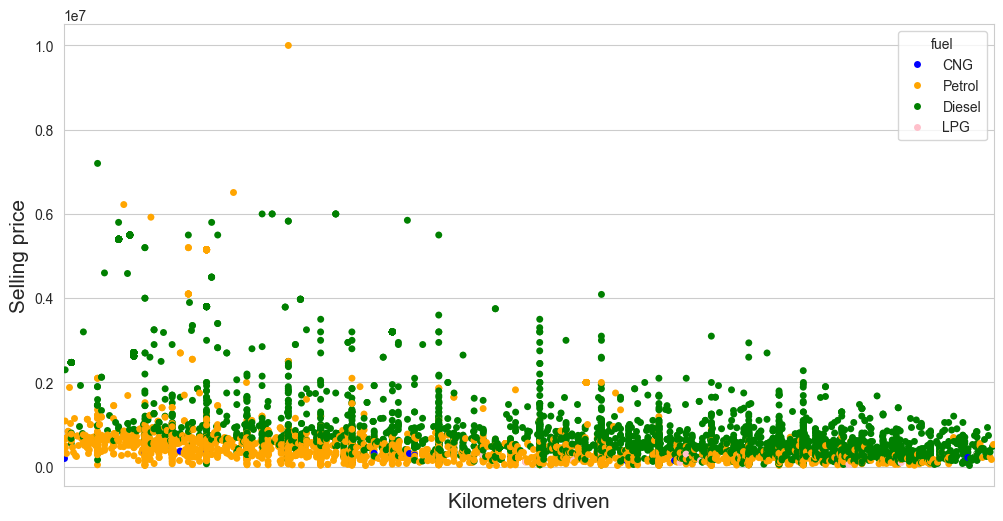

In [5]:
plt.figure(figsize=(12,6))
sns.stripplot(data=details,
               x = 'km_driven',
               y = 'selling_price',
            hue='fuel',
            palette=['blue', 'orange', 'green', 'pink'],
            jitter= True)

#ticks = [0, 1E6, 2E6, 3E6]
# plt.xticks(rotation=45, fontsize=10)
plt.xticks([])
#plt.gca().set_xticks([0, 1, 2, 3])
plt.yticks(fontsize=10)
plt.xlabel("Kilometers driven", fontsize=15)
plt.ylabel("Selling price", fontsize=15)


Petrol cars sell at a lower price than diesel cars mostly. 

## 3. Impact of the No. of Owners on Selling Price

Text(0, 0.5, 'Selling price')

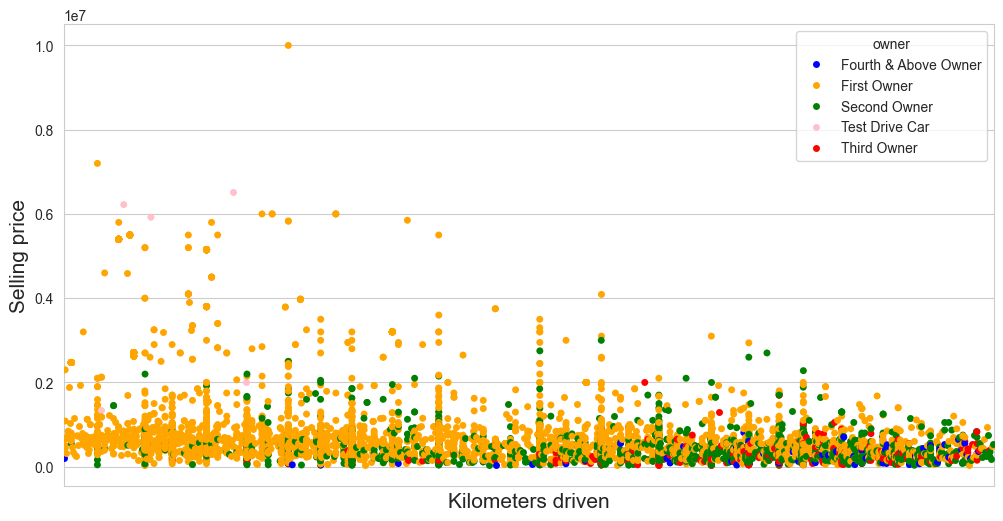

In [6]:
plt.figure(figsize=(12,6))
sns.stripplot(data=details,
               x = 'km_driven',
               y = 'selling_price',
            hue='owner',
            palette=['blue', 'orange', 'green', 'pink', 'red'],
            jitter= True)

#ticks = [0, 1E6, 2E6, 3E6]
# plt.xticks(rotation=45, fontsize=10)
plt.xticks([])
#plt.gca().set_xticks([0, 1, 2, 3])
plt.yticks(fontsize=10)
plt.xlabel("Kilometers driven", fontsize=15)
plt.ylabel("Selling price", fontsize=15)

Cars that have been owned once generally sell at a higher price.

In [7]:
details.count()

name             8128
year             8128
selling_price    8128
km_driven        8128
fuel             8128
seller_type      8128
transmission     8128
owner            8128
mileage          7907
engine           7907
max_power        7913
torque           7906
seats            7907
dtype: int64

In [8]:
details = details.dropna()

In [9]:
details.count()

name             7906
year             7906
selling_price    7906
km_driven        7906
fuel             7906
seller_type      7906
transmission     7906
owner            7906
mileage          7906
engine           7906
max_power        7906
torque           7906
seats            7906
dtype: int64

## 4. Dropping units of engine capacity and maximum power

In [10]:
# converting the column 'engine' to string
# then we drop the cubic centimeter units
def drop_cc (x):
    ans = x.replace('CC','').strip()
    return(ans)

# converting the column 'engine' to string
details['engine']=details['engine'].astype(str)

details['engine_cap_cc'] = pd.to_numeric(details['engine'].apply(drop_cc), errors='coerce')

details.head(10)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,engine_cap_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1248
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1498
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,1497
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1396
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1298
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,1197
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,1061
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,796
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,1364
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,1399


In [11]:
# dropping the horse power units
def drop_bhp (x):
    ans = x.replace('bhp','').strip()
    return ans

# converting the column 'engine' to string
details['max_power']=details['max_power'].astype(str)

details['fuel'] = details['fuel'].astype(str)

details['max_power_bhp'] = pd.to_numeric(details['max_power'].apply(drop_bhp), errors='coerce')

details.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,engine_cap_cc,max_power_bhp
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1248,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1498,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,1497,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1396,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1298,88.20
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,1197,81.86
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,1061,57.50
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,796,37.00
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,1364,67.10
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,1399,68.10


## 5. Conversion of mileage units

For CNG Density: https://www.aqua-calc.com/page/density-table/substance/compressed-blank-natural-blank-gas

For LPG Density: https://www.aqua-calc.com/page/density-table/substance/liquefied-blank-petroleum-blank-gas

In [12]:
# cng_rows = details[details['fuel'] == 'CNG']
# cng_rows

#cng_rows.shape

In [13]:

# converting the column 'engine' to string
# cng_rows['mileage']= cng_rows['mileage'].astype(str)
# cng_rows['mileage_kmpkg'] = cng_rows['mileage'].apply(drop_kmpkg)

# cng_rows.head(10)

In [14]:
def drop_kmpkg (x):
    ans = x.replace('km/kg','')
    return (ans)

def drop_kmpl (x):
    ans = x.replace('kmpl','').strip()
    return ans

def cng_conversion (x):
    st1 = x.replace('km/kg','')
    ans = str(float(st1)*0.13) + " kmpl"
    return ans

def lpg_conversion (x):
    st1 = x.replace('km/kg','')
    ans = str(0.51 * float (st1))+" kmpl"
    return ans


In [15]:
details.loc[details['fuel'] == 'Diesel', 'mileage_kmpl'] = details ['mileage']
details.loc[details['fuel'] == 'Petrol', 'mileage_kmpl'] = details ['mileage']

details.loc[details['fuel']=='CNG', 'mileage_kmpl'] = details.loc[details['fuel'] == 'CNG', 'mileage'].apply(cng_conversion)

details.loc[details['fuel']=='LPG', 'mileage_kmpl'] = details.loc[details['fuel']=='LPG', 'mileage'].apply(lpg_conversion)

details['mileage_kmpl'] = details ['mileage_kmpl'].astype(str)

details['mileage_kmpl_dropped'] = pd.to_numeric(details['mileage_kmpl'].apply(drop_kmpl), errors='coerce')

In [16]:
details[details['fuel'] == 'Petrol']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,engine_cap_cc,max_power_bhp,mileage_kmpl,mileage_kmpl_dropped
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,1497,78.00,17.7 kmpl,17.70
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1298,88.20,16.1 kmpl,16.10
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,1197,81.86,20.14 kmpl,20.14
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,796,37.00,16.1 kmpl,16.10
11,Maruti Zen LX,2005,92000,100000,Petrol,Individual,Manual,Second Owner,17.3 kmpl,993 CC,60 bhp,78Nm@ 4500rpm,5.0,993,60.00,17.3 kmpl,17.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,Hyundai i20 Magna,2013,380000,25000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,1197,82.85,18.5 kmpl,18.50
8119,Maruti Wagon R LXI Optional,2017,360000,80000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0,998,67.04,20.51 kmpl,20.51
8120,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0,1086,62.10,17.92 kmpl,17.92
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0,998,67.10,18.9 kmpl,18.90


In [17]:
details[details['fuel'] == 'Diesel']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,engine_cap_cc,max_power_bhp,mileage_kmpl,mileage_kmpl_dropped
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1248,74.00,23.4 kmpl,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1498,103.52,21.14 kmpl,21.14
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1396,90.00,23.0 kmpl,23.00
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,1364,67.10,23.59 kmpl,23.59
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,1399,68.10,20.0 kmpl,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0,1396,88.73,22.54 kmpl,22.54
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,1493,110.00,16.8 kmpl,16.80
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,1248,73.90,19.3 kmpl,19.30
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,1396,70.00,23.57 kmpl,23.57


In [18]:
details[details['fuel'] == 'LPG']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,engine_cap_cc,max_power_bhp,mileage_kmpl,mileage_kmpl_dropped
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,1061,57.50,8.823 kmpl,8.8230
90,Maruti Wagon R LXI LPG BSIV,2010,225000,44000,LPG,Dealer,Manual,First Owner,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0,998,58.20,13.362 kmpl,13.3620
870,Maruti Wagon R Duo Lxi,2012,231000,70000,LPG,Individual,Manual,First Owner,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0,998,58.20,13.362 kmpl,13.3620
1511,Maruti Wagon R Duo Lxi,2012,300000,100000,LPG,Individual,Manual,Second Owner,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0,998,58.20,13.362 kmpl,13.3620
1658,Maruti Wagon R LXI DUO BSIII,2007,105000,90000,LPG,Individual,Manual,Second Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,1061,57.50,8.823 kmpl,8.8230
1907,Hyundai Santro Xing GLS LPG,2011,250000,100000,LPG,Individual,Manual,Second Owner,13.45 km/kg,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0,1086,62.10,6.8595 kmpl,6.8595
2108,Maruti Wagon R LXI DUO BSIII,2008,170000,112000,LPG,Individual,Manual,Second Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,1061,57.50,8.823 kmpl,8.8230
2166,Maruti Wagon R LXI DUO BSIII,2010,200000,40000,LPG,Individual,Manual,Fourth & Above Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,1061,57.50,8.823 kmpl,8.8230
2484,Hyundai Santro Xing GLS LPG,2010,150000,70000,LPG,Individual,Manual,Third Owner,13.45 km/kg,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0,1086,62.10,6.8595 kmpl,6.8595
2518,Maruti Wagon R LXI LPG BSIV,2010,275000,50000,LPG,Individual,Manual,First Owner,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0,998,58.20,13.362 kmpl,13.3620


In [19]:
details[details['fuel'] == 'CNG']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,engine_cap_cc,max_power_bhp,mileage_kmpl,mileage_kmpl_dropped
35,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44 km/kg,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0,796,40.30,4.3472 kmpl,4.3472
203,Maruti Wagon R LXI CNG,2016,360000,50000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0,998,58.16,3.458 kmpl,3.4580
402,Maruti Eeco CNG 5 Seater AC,2020,409999,35000,CNG,Individual,Manual,First Owner,20.88 km/kg,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0,1196,61.70,2.7144 kmpl,2.7144
866,Maruti Alto 800 CNG LXI,2012,165000,60000,CNG,Individual,Manual,Second Owner,30.46 km/kg,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0,796,47.30,3.9598000000000004 kmpl,3.9598
1225,Maruti Eeco CNG 5 Seater AC BSIV,2019,450000,10000,CNG,Individual,Manual,First Owner,21.94 km/kg,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0,1196,61.70,2.8522000000000003 kmpl,2.8522
1239,Maruti Eeco CNG 5 Seater AC BSIV,2017,370000,140000,CNG,Individual,Manual,First Owner,21.94 km/kg,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0,1196,61.70,2.8522000000000003 kmpl,2.8522
1350,Maruti Eeco CNG 5 Seater AC BSIV,2019,450000,60000,CNG,Individual,Manual,First Owner,21.94 km/kg,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0,1196,61.70,2.8522000000000003 kmpl,2.8522
2312,Maruti Wagon R CNG LXI,2013,270000,80000,CNG,Individual,Manual,Second Owner,32.52 km/kg,998 CC,58.33 bhp,78Nm@ 3500rpm,5.0,998,58.33,4.227600000000001 kmpl,4.2276
2481,Maruti Wagon R LXI CNG,2016,300000,50000,CNG,Individual,Manual,Second Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0,998,58.16,3.458 kmpl,3.4580
2513,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0,998,58.16,3.458 kmpl,3.4580


## 6 a) Categorical Variables: Fuel

In [20]:
details ['fuel_petrol'] = pd.get_dummies(details ['fuel'], dtype = int)['Petrol']
details ['fuel_diesel'] = pd.get_dummies(details ['fuel'], dtype = int)['Diesel']
details ['fuel_cng'] = pd.get_dummies(details ['fuel'], dtype = int)['CNG']
details ['fuel_lpg'] = pd.get_dummies(details ['fuel'], dtype = int)['LPG']

details.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,torque,seats,engine_cap_cc,max_power_bhp,mileage_kmpl,mileage_kmpl_dropped,fuel_petrol,fuel_diesel,fuel_cng,fuel_lpg
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,...,190Nm@ 2000rpm,5.0,1248,74.00,23.4 kmpl,23.400,0,1,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,...,250Nm@ 1500-2500rpm,5.0,1498,103.52,21.14 kmpl,21.140,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,...,"12.7@ 2,700(kgm@ rpm)",5.0,1497,78.00,17.7 kmpl,17.700,1,0,0,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,...,22.4 kgm at 1750-2750rpm,5.0,1396,90.00,23.0 kmpl,23.000,0,1,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,...,"11.5@ 4,500(kgm@ rpm)",5.0,1298,88.20,16.1 kmpl,16.100,1,0,0,0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,...,113.75nm@ 4000rpm,5.0,1197,81.86,20.14 kmpl,20.140,1,0,0,0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,...,"7.8@ 4,500(kgm@ rpm)",5.0,1061,57.50,8.823 kmpl,8.823,0,0,0,1
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,...,59Nm@ 2500rpm,4.0,796,37.00,16.1 kmpl,16.100,1,0,0,0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,...,170Nm@ 1800-2400rpm,5.0,1364,67.10,23.59 kmpl,23.590,0,1,0,0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,...,160Nm@ 2000rpm,5.0,1399,68.10,20.0 kmpl,20.000,0,1,0,0


## 6 b) Categorical variables: Seller Type

In [21]:
print('Types of seller: ',seller_unique_entries)

Types of seller:  ['Individual' 'Dealer' 'Trustmark Dealer']


In [22]:
details ['seller_individual'] = pd.get_dummies(details ['seller_type'], dtype = int)['Individual']
details ['seller_dealer'] = pd.get_dummies(details ['seller_type'], dtype = int)['Dealer']
details ['seller_trustmark'] = pd.get_dummies(details ['seller_type'], dtype = int)['Trustmark Dealer']

details.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,max_power_bhp,mileage_kmpl,mileage_kmpl_dropped,fuel_petrol,fuel_diesel,fuel_cng,fuel_lpg,seller_individual,seller_dealer,seller_trustmark
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,...,74.00,23.4 kmpl,23.400,0,1,0,0,1,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,...,103.52,21.14 kmpl,21.140,0,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,...,78.00,17.7 kmpl,17.700,1,0,0,0,1,0,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,...,90.00,23.0 kmpl,23.000,0,1,0,0,1,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,...,88.20,16.1 kmpl,16.100,1,0,0,0,1,0,0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,...,81.86,20.14 kmpl,20.140,1,0,0,0,1,0,0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,...,57.50,8.823 kmpl,8.823,0,0,0,1,1,0,0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,...,37.00,16.1 kmpl,16.100,1,0,0,0,1,0,0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,...,67.10,23.59 kmpl,23.590,0,1,0,0,1,0,0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,...,68.10,20.0 kmpl,20.000,0,1,0,0,1,0,0


## 6 c) Categorical variables: Transmission

In [23]:
print('Types of transmission: ',transmission_unique_entries)

Types of transmission:  ['Manual' 'Automatic']


In [24]:
details ['trans_manual'] = pd.get_dummies(details ['transmission'], dtype = int)['Manual']
details ['trans_automatic'] = pd.get_dummies(details ['transmission'], dtype = int)['Automatic']

details.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,mileage_kmpl_dropped,fuel_petrol,fuel_diesel,fuel_cng,fuel_lpg,seller_individual,seller_dealer,seller_trustmark,trans_manual,trans_automatic
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,...,23.400,0,1,0,0,1,0,0,1,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,...,21.140,0,1,0,0,1,0,0,1,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,...,17.700,1,0,0,0,1,0,0,1,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,...,23.000,0,1,0,0,1,0,0,1,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,...,16.100,1,0,0,0,1,0,0,1,0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,...,20.140,1,0,0,0,1,0,0,1,0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,...,8.823,0,0,0,1,1,0,0,1,0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,...,16.100,1,0,0,0,1,0,0,1,0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,...,23.590,0,1,0,0,1,0,0,1,0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,...,20.000,0,1,0,0,1,0,0,1,0


## 6 d) Categorical variables: Owner type

In [25]:
print('Types of owners: ',owner_unique_entries)

Types of owners:  ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [30]:
details ['owner_first'] = pd.get_dummies(details ['owner'], dtype = int)['First Owner']
details ['owner_second'] = pd.get_dummies(details ['owner'], dtype = int)['Second Owner']
details ['owner_third'] = pd.get_dummies(details ['owner'], dtype = int)['Third Owner']
details ['owner_fourth'] = pd.get_dummies(details ['owner'], dtype = int)['Fourth & Above Owner']
details ['owner_test'] = pd.get_dummies(details ['owner'], dtype = int)['Test Drive Car']

details.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,seller_individual,seller_dealer,seller_trustmark,trans_manual,trans_automatic,owner_first,owner_second,owner_third,owner_fourth,owner_test
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,...,1,0,0,1,0,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,...,1,0,0,1,0,0,1,0,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,...,1,0,0,1,0,0,0,1,0,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,...,1,0,0,1,0,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,...,1,0,0,1,0,1,0,0,0,0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,...,1,0,0,1,0,1,0,0,0,0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,...,1,0,0,1,0,1,0,0,0,0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,...,1,0,0,1,0,0,1,0,0,0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,...,1,0,0,1,0,1,0,0,0,0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,...,1,0,0,1,0,1,0,0,0,0


In [31]:
details.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'engine_cap_cc', 'max_power_bhp', 'mileage_kmpl',
       'mileage_kmpl_dropped', 'fuel_petrol', 'fuel_diesel', 'fuel_cng',
       'fuel_lpg', 'seller_individual', 'seller_dealer', 'seller_trustmark',
       'trans_manual', 'trans_automatic', 'owner_first', 'owner_second',
       'owner_third', 'owner_fourth', 'owner_test'],
      dtype='object')

In [32]:
interested_features = ['name', 'year', 'selling_price', 'km_driven', 'torque',
       'seats', 'engine_cap_cc', 'max_power_bhp', 
       'mileage_kmpl_dropped', 'fuel_petrol', 'fuel_diesel', 'fuel_cng',
       'fuel_lpg', 'seller_individual', 'seller_dealer', 'seller_trustmark',
       'trans_manual', 'trans_automatic', 'owner_first', 'owner_second',
       'owner_third', 'owner_fourth', 'owner_test']

details[interested_features].head(10)

,name,year,selling_price,km_driven,torque,seats,engine_cap_cc,max_power_bhp,mileage_kmpl_dropped,fuel_petrol,...,seller_individual,seller_dealer,seller_trustmark,trans_manual,trans_automatic,owner_first,owner_second,owner_third,owner_fourth,owner_test
0,Maruti Swift Dzire VDI,2014,450000,145500,190Nm@ 2000rpm,5.0,1248,74.00,23.400,0,...,1,0,0,1,0,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,250Nm@ 1500-2500rpm,5.0,1498,103.52,21.140,0,...,1,0,0,1,0,0,1,0,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,"12.7@ 2,700(kgm@ rpm)",5.0,1497,78.00,17.700,1,...,1,0,0,1,0,0,0,1,0,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,22.4 kgm at 1750-2750rpm,5.0,1396,90.00,23.000,0,...,1,0,0,1,0,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,"11.5@ 4,500(kgm@ rpm)",5.0,1298,88.20,16.100,1,...,1,0,0,1,0,1,0,0,0,0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,113.75nm@ 4000rpm,5.0,1197,81.86,20.140,1,...,1,0,0,1,0,1,0,0,0,0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,"7.8@ 4,500(kgm@ rpm)",5.0,1061,57.50,8.823,0,...,1,0,0,1,0,1,0,0,0,0
7,Maruti 800 DX BSII,2001,45000,5000,59Nm@ 2500rpm,4.0,796,37.00,16.100,1,...,1,0,0,1,0,0,1,0,0,0
8,Toyota Etios VXD,2011,350000,90000,170Nm@ 1800-2400rpm,5.0,1364,67.10,23.590,0,...,1,0,0,1,0,1,0,0,0,0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,160Nm@ 2000rpm,5.0,1399,68.10,20.000,0,...,1,0,0,1,0,1,0,0,0,0
